In [2]:
link = "https://www.quora.com/What-does-it-mean-in-phase-out-of-phase-in-voltage-current-at-power-system"

In [1]:
#PF = Power Factor
#PF = KW/KVA

In [2]:
# 1.Summary of the data set that, at a minimum, answers the following questions: 
#     What is the unit of analysis? 
#     How many observations in total are in the data set? 
#     How many unique observations are in the data set? 
#     What time period is covered?
    
# 2.Brief summary of any data cleaning steps you have performed. 
# For example, are there any particular observations / time periods / groups / etc. you have excluded?

# 3.Description of outcome with an appropriate visualization technique.

# 4.Description of key predictors with appropriate visualization techniques that compare predictors to the response. 
# You should investigate all predictors in your data as part of your project. 
# For the purpose of this assignment, pick the one or two predictors that you think are going to be most important in explaining the outcome. 
# Your selection of predictors can either be guided by your domain knowledge or be the result of your EDA on all predictors.

In [3]:
#pip install xgboost

In [4]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [5]:
# mean_squared_error will give us more penalty for any predictions thats way off vs just a little bit off.
# Regression can be used fot Time Series 


In [6]:
df1 = pd.read_csv('01E002218541_20210101_20211231.csv')
df2 = pd.read_csv('01E002992787_20220101_20220824.csv')

In [7]:
#For Year 2021
df1.head()

,Meter ID,Date / Time,KW(ch: 1 set:1),KVA(ch: 2 set:1),PF(1(ch: 2 set:1)
0,01E002218541,1/1/21 00:15,91.36,93.36,0.98
1,01E002218541,1/1/21 00:30,85.04,86.48,0.98
2,01E002218541,1/1/21 00:45,87.52,88.72,0.99
3,01E002218541,1/1/21 01:00,87.28,88.72,0.98
4,01E002218541,1/1/21 01:15,89.12,90.64,0.98


In [8]:
#For Year 2022
df2.head()

,Meter ID,Date / Time,KW(ch: 1 set:1),KVA(ch: 2 set:1),PF(1(ch: 2 set:1)
0,01E002992787,1/1/22 00:15,87.12,87.92,0.99
1,01E002992787,1/1/22 00:30,63.91,58.08,1.10
2,01E002992787,1/1/22 00:45,63.35,57.52,1.10
3,01E002992787,1/1/22 01:00,69.19,64.16,1.08
4,01E002992787,1/1/22 01:15,66.55,61.04,1.09


In [9]:
len(df1)

35040

In [10]:
len(df2)

22652

In [11]:
df1.columns

Index(['Meter ID         ', 'Date / Time           ', 'KW(ch: 1  set:1)    ',
       'KVA(ch: 2  set:1)   ', 'PF(1(ch: 2  set:1)  '],
      dtype='object')

In [12]:
df1 = df1.rename({'Meter ID         ': 'Meter_ID', 'Date / Time           ': 'Date&Time', 'KW(ch: 1  set:1)    ': 'KW', 'KVA(ch: 2  set:1)   ': 'KVA', 'PF(1(ch: 2  set:1)  ':'PF'}, axis='columns')

In [13]:
df2 = df2.rename({'Meter ID         ': 'Meter_ID', 'Date / Time           ': 'Date&Time', 'KW(ch: 1  set:1)    ': 'KW', 'KVA(ch: 2  set:1)   ': 'KVA', 'PF(1(ch: 2  set:1)  ':'PF'}, axis='columns')

In [14]:
#PF above 1 is not possible so we should delete the entries having PF>1
#First we will find out such entries
(df2['PF'] > 1).value_counts()

False    22500
True       152
Name: PF, dtype: int64

In [15]:
(df1['PF'] > 1).value_counts()

False    35034
True         6
Name: PF, dtype: int64

In [16]:
#Now we will delete the entries

In [17]:
#df1 = df1.loc[df1['PF'] <= 1]
#df1.reset_index(drop = True, inplace = True)

In [18]:
#df2 = df2.loc[df2['PF'] <= 1]
#df2.reset_index(drop = True, inplace = True)

In [19]:
df2.head()

,Meter_ID,Date&Time,KW,KVA,PF
0,01E002992787,1/1/22 00:15,87.12,87.92,0.99
1,01E002992787,1/1/22 00:30,63.91,58.08,1.10
2,01E002992787,1/1/22 00:45,63.35,57.52,1.10
3,01E002992787,1/1/22 01:00,69.19,64.16,1.08
4,01E002992787,1/1/22 01:15,66.55,61.04,1.09


In [20]:
#Strip the leading and trailing spaces
df2['Date&Time'] = df2['Date&Time'].apply(lambda x: x.strip())
df1['Date&Time'] = df1['Date&Time'].apply(lambda x: x.strip())

In [21]:
#Convert the strings into datetime objects
df2['Date&Time'] = df2['Date&Time'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
df1['Date&Time'] = df1['Date&Time'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))

In [22]:
#energy_box_plot = sns.boxplot(x="KW", y="Date&Time", data=df1)

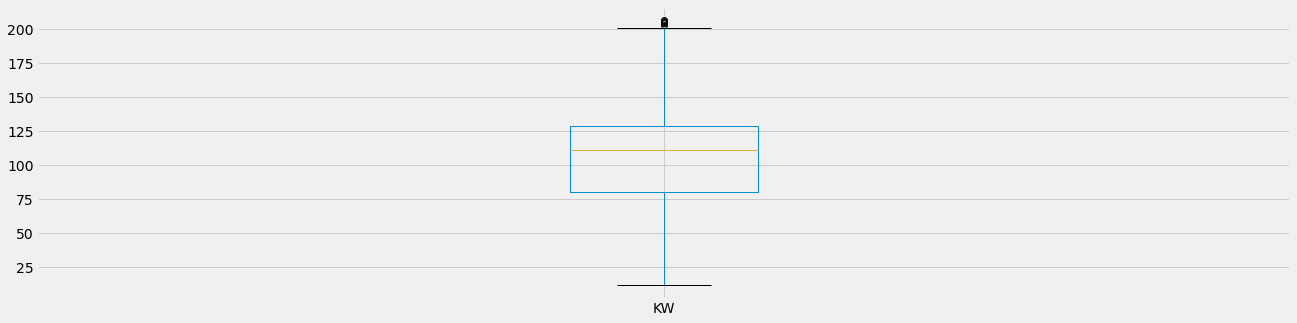

In [23]:
df1.boxplot(column='KW', return_type='axes',figsize=(20,5));

In [24]:
(df1.KW > 200).value_counts()

False    35033
True         7
Name: KW, dtype: int64

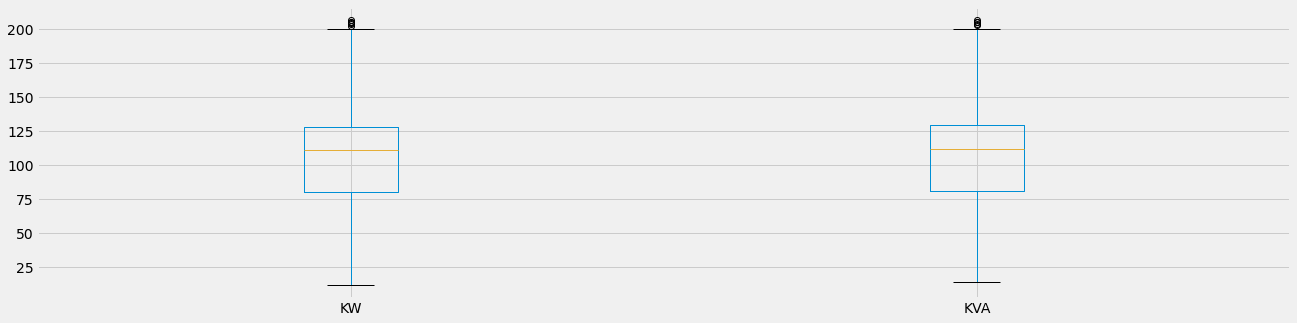

In [25]:
df1.boxplot(column=['KW','KVA'], return_type='axes',figsize=(20,5));

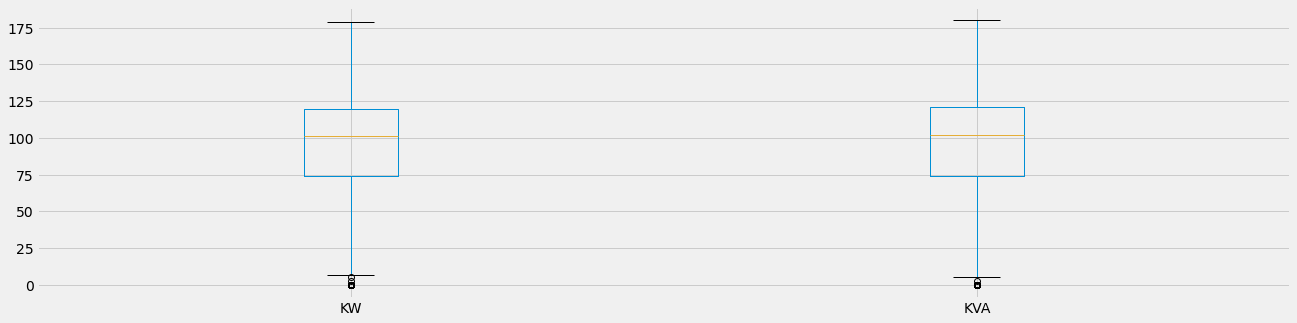

In [26]:
df2.boxplot(column=['KW','KVA'], return_type='axes',figsize=(20,5));

In [27]:
df1.describe()

,KW,KVA,PF
count,35040.000000,35040.000000,35040.000000
mean,107.583120,108.423353,0.991724
std,30.152194,30.277200,0.005702
min,11.600000,14.080000,0.770000
25%,79.920000,80.720000,0.990000
50%,110.800000,111.680000,0.990000
75%,128.320000,129.280000,0.990000
max,206.560000,206.880000,1.010000


In [28]:
df2.describe()

,KW,KVA,PF
count,22652.000000,22652.000000,22652.000000
mean,99.872628,100.499726,0.986139
std,31.379789,31.613717,0.089866
min,0.000000,0.000000,0.000000
25%,74.160000,74.400000,0.990000
50%,101.280000,101.920000,0.990000
75%,119.920000,120.800000,1.000000
max,178.880000,180.160000,1.140000


In [29]:
df1.KW.nunique(dropna = True)

1842

In [30]:
df2.KW.nunique(dropna = True)

1967

In [31]:
df2.KVA.nunique(dropna = True)

1725

In [32]:
df1.KVA.nunique(dropna = True)

1670

In [33]:
df1.PF.nunique(dropna = True)

12

In [34]:
df1.PF.nunique(dropna = True)

12

In [35]:
df2.isna().value_counts()

Meter_ID  Date&Time  KW     KVA    PF   
False     False      False  False  False    22652
dtype: int64

In [36]:
df1.isna().value_counts()

Meter_ID  Date&Time  KW     KVA    PF   
False     False      False  False  False    35040
dtype: int64

In [37]:
#get bar and hist plot for per day/week/month


In [38]:
Q1 = df1['KW'].quantile(0.25)
Q3 = df1['KW'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['KW'] >= Q1 - 1.5 * IQR) & (df1['KW'] <= Q3 + 1.5 *IQR)
df1.loc[filter] 

,Meter_ID,Date&Time,KW,KVA,PF
0,01E002218541,2021-01-01 00:15:00,91.36,93.36,0.98
1,01E002218541,2021-01-01 00:30:00,85.04,86.48,0.98
2,01E002218541,2021-01-01 00:45:00,87.52,88.72,0.99
3,01E002218541,2021-01-01 01:00:00,87.28,88.72,0.98
4,01E002218541,2021-01-01 01:15:00,89.12,90.64,0.98
...,...,...,...,...,...
35035,01E002218541,2021-12-31 23:00:00,99.84,100.24,1.00
35036,01E002218541,2021-12-31 23:15:00,89.20,90.00,0.99
35037,01E002218541,2021-12-31 23:30:00,90.08,90.80,0.99
35038,01E002218541,2021-12-31 23:45:00,87.44,88.16,0.99


Text(0, 0.5, 'counts')

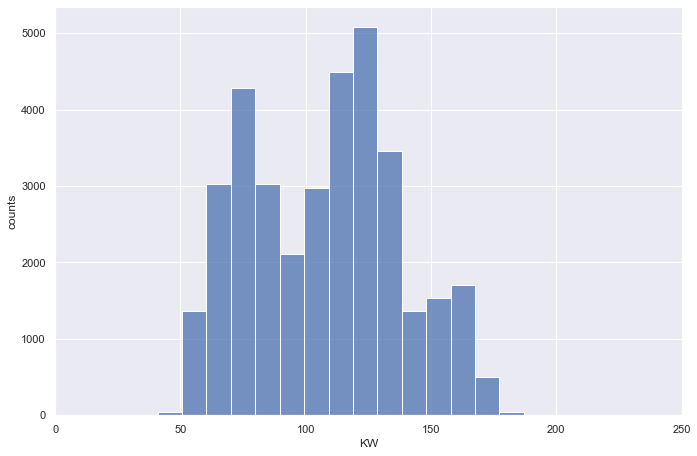

In [39]:
#Histogram for frequency of KW values.

import seaborn as sns
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(10, 7))
ax = sns.histplot(df1.KW, kde=False, bins=20)

ax.set(xlim=(0, 250))
ax.set_ylabel('counts')

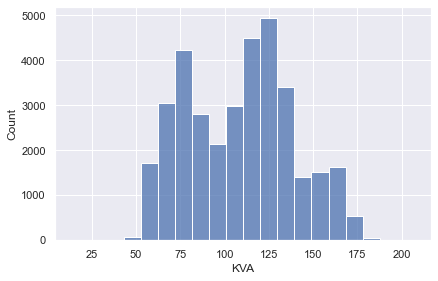

In [40]:
ax = sns.histplot(df1.KVA, kde=False, bins=20)

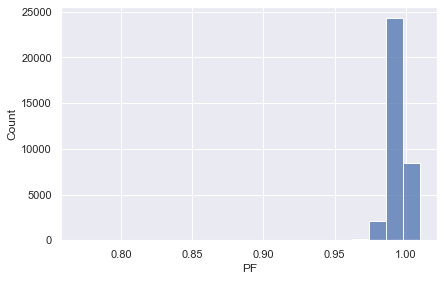

In [41]:
ax = sns.histplot(df1.PF, kde=False, bins=20)

In [42]:
#get bar plot for per day/week/month

In [43]:
df1

,Meter_ID,Date&Time,KW,KVA,PF
0,01E002218541,2021-01-01 00:15:00,91.36,93.36,0.98
1,01E002218541,2021-01-01 00:30:00,85.04,86.48,0.98
2,01E002218541,2021-01-01 00:45:00,87.52,88.72,0.99
3,01E002218541,2021-01-01 01:00:00,87.28,88.72,0.98
4,01E002218541,2021-01-01 01:15:00,89.12,90.64,0.98
...,...,...,...,...,...
35035,01E002218541,2021-12-31 23:00:00,99.84,100.24,1.00
35036,01E002218541,2021-12-31 23:15:00,89.20,90.00,0.99
35037,01E002218541,2021-12-31 23:30:00,90.08,90.80,0.99
35038,01E002218541,2021-12-31 23:45:00,87.44,88.16,0.99


In [44]:
np.array_split(df1,365)[4]

,Meter_ID,Date&Time,KW,KVA,PF
384,01E002218541,2021-01-05 00:15:00,74.72,75.60,0.99
385,01E002218541,2021-01-05 00:30:00,64.48,65.28,0.99
386,01E002218541,2021-01-05 00:45:00,68.80,70.24,0.98
387,01E002218541,2021-01-05 01:00:00,69.68,70.80,0.98
388,01E002218541,2021-01-05 01:15:00,135.92,136.32,1.00
...,...,...,...,...,...
475,01E002218541,2021-01-05 23:00:00,74.40,74.80,0.99
476,01E002218541,2021-01-05 23:15:00,64.48,65.52,0.98
477,01E002218541,2021-01-05 23:30:00,116.08,116.72,0.99
478,01E002218541,2021-01-05 23:45:00,138.96,139.28,1.00


In [45]:
#Averge of each month
monthly_avg = []
df_split_avg_month = np.array_split(df1,12)
for i in range(0,12):
    monthly_avg.append(df_split_avg_month[i]['KW'].mean())
    
print(monthly_avg)    

[123.71519178082217, 119.84597260273982, 93.57538356164386, 83.83230136986317, 96.77476712328766, 119.69158904109577, 123.6045342465752, 125.30632876712332, 117.55438356164402, 98.19216438356155, 96.9929041095891, 91.91192465753407]


<AxesSubplot:>

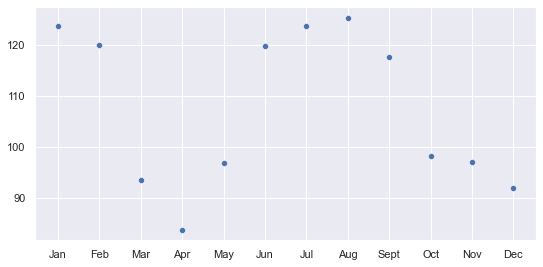

In [46]:
import seaborn as sns
sns.set(color_codes=True)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
f, ax = plt.subplots(1,1, figsize=(8, 4))
sns.scatterplot(ax=ax, x = months, y=monthly_avg )

<AxesSubplot:>

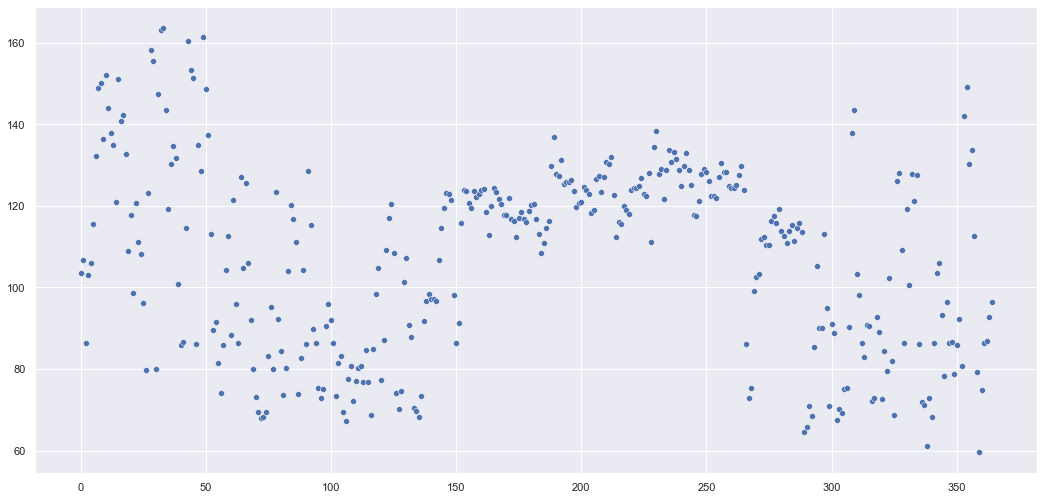

In [47]:
#Averge of each day
daily_avg = []
df_split_avg_day = np.array_split(df1,365)
for i in range(0,365):
    daily_avg.append(df_split_avg_day[i]['KW'].mean())
        
f, ax = plt.subplots(1,1, figsize=(16, 8))        
sns.scatterplot(ax=ax, x = [d for d in range(0,365)], y= daily_avg)

<AxesSubplot:>

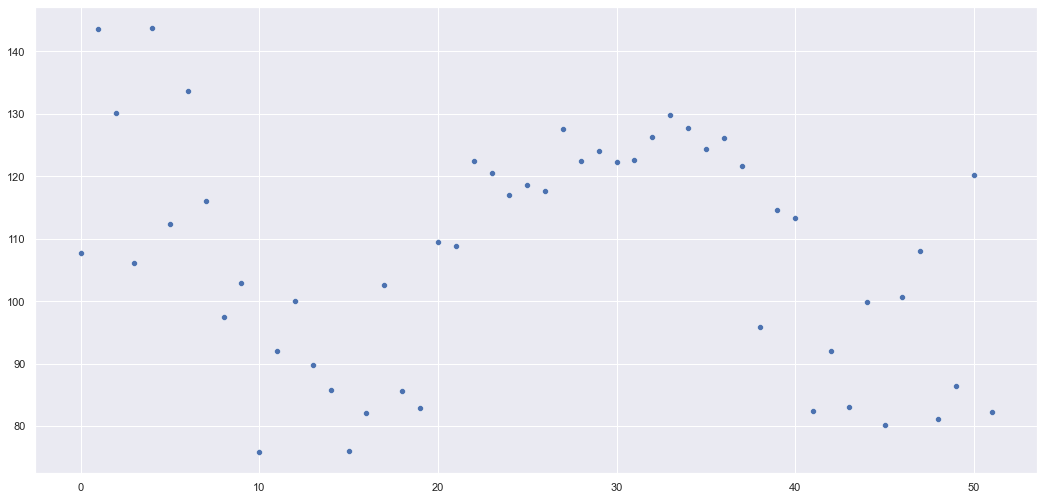

In [48]:
#Averge of each week
weekly_avg = []
df_split_avg_week = np.array_split(df1,52)
for i in range(0,52):
    weekly_avg.append(df_split_avg_week[i]['KW'].mean())
        
f, ax = plt.subplots(1,1, figsize=(16, 8))        
sns.scatterplot(ax=ax, x = [d for d in range(0,52)], y= weekly_avg)

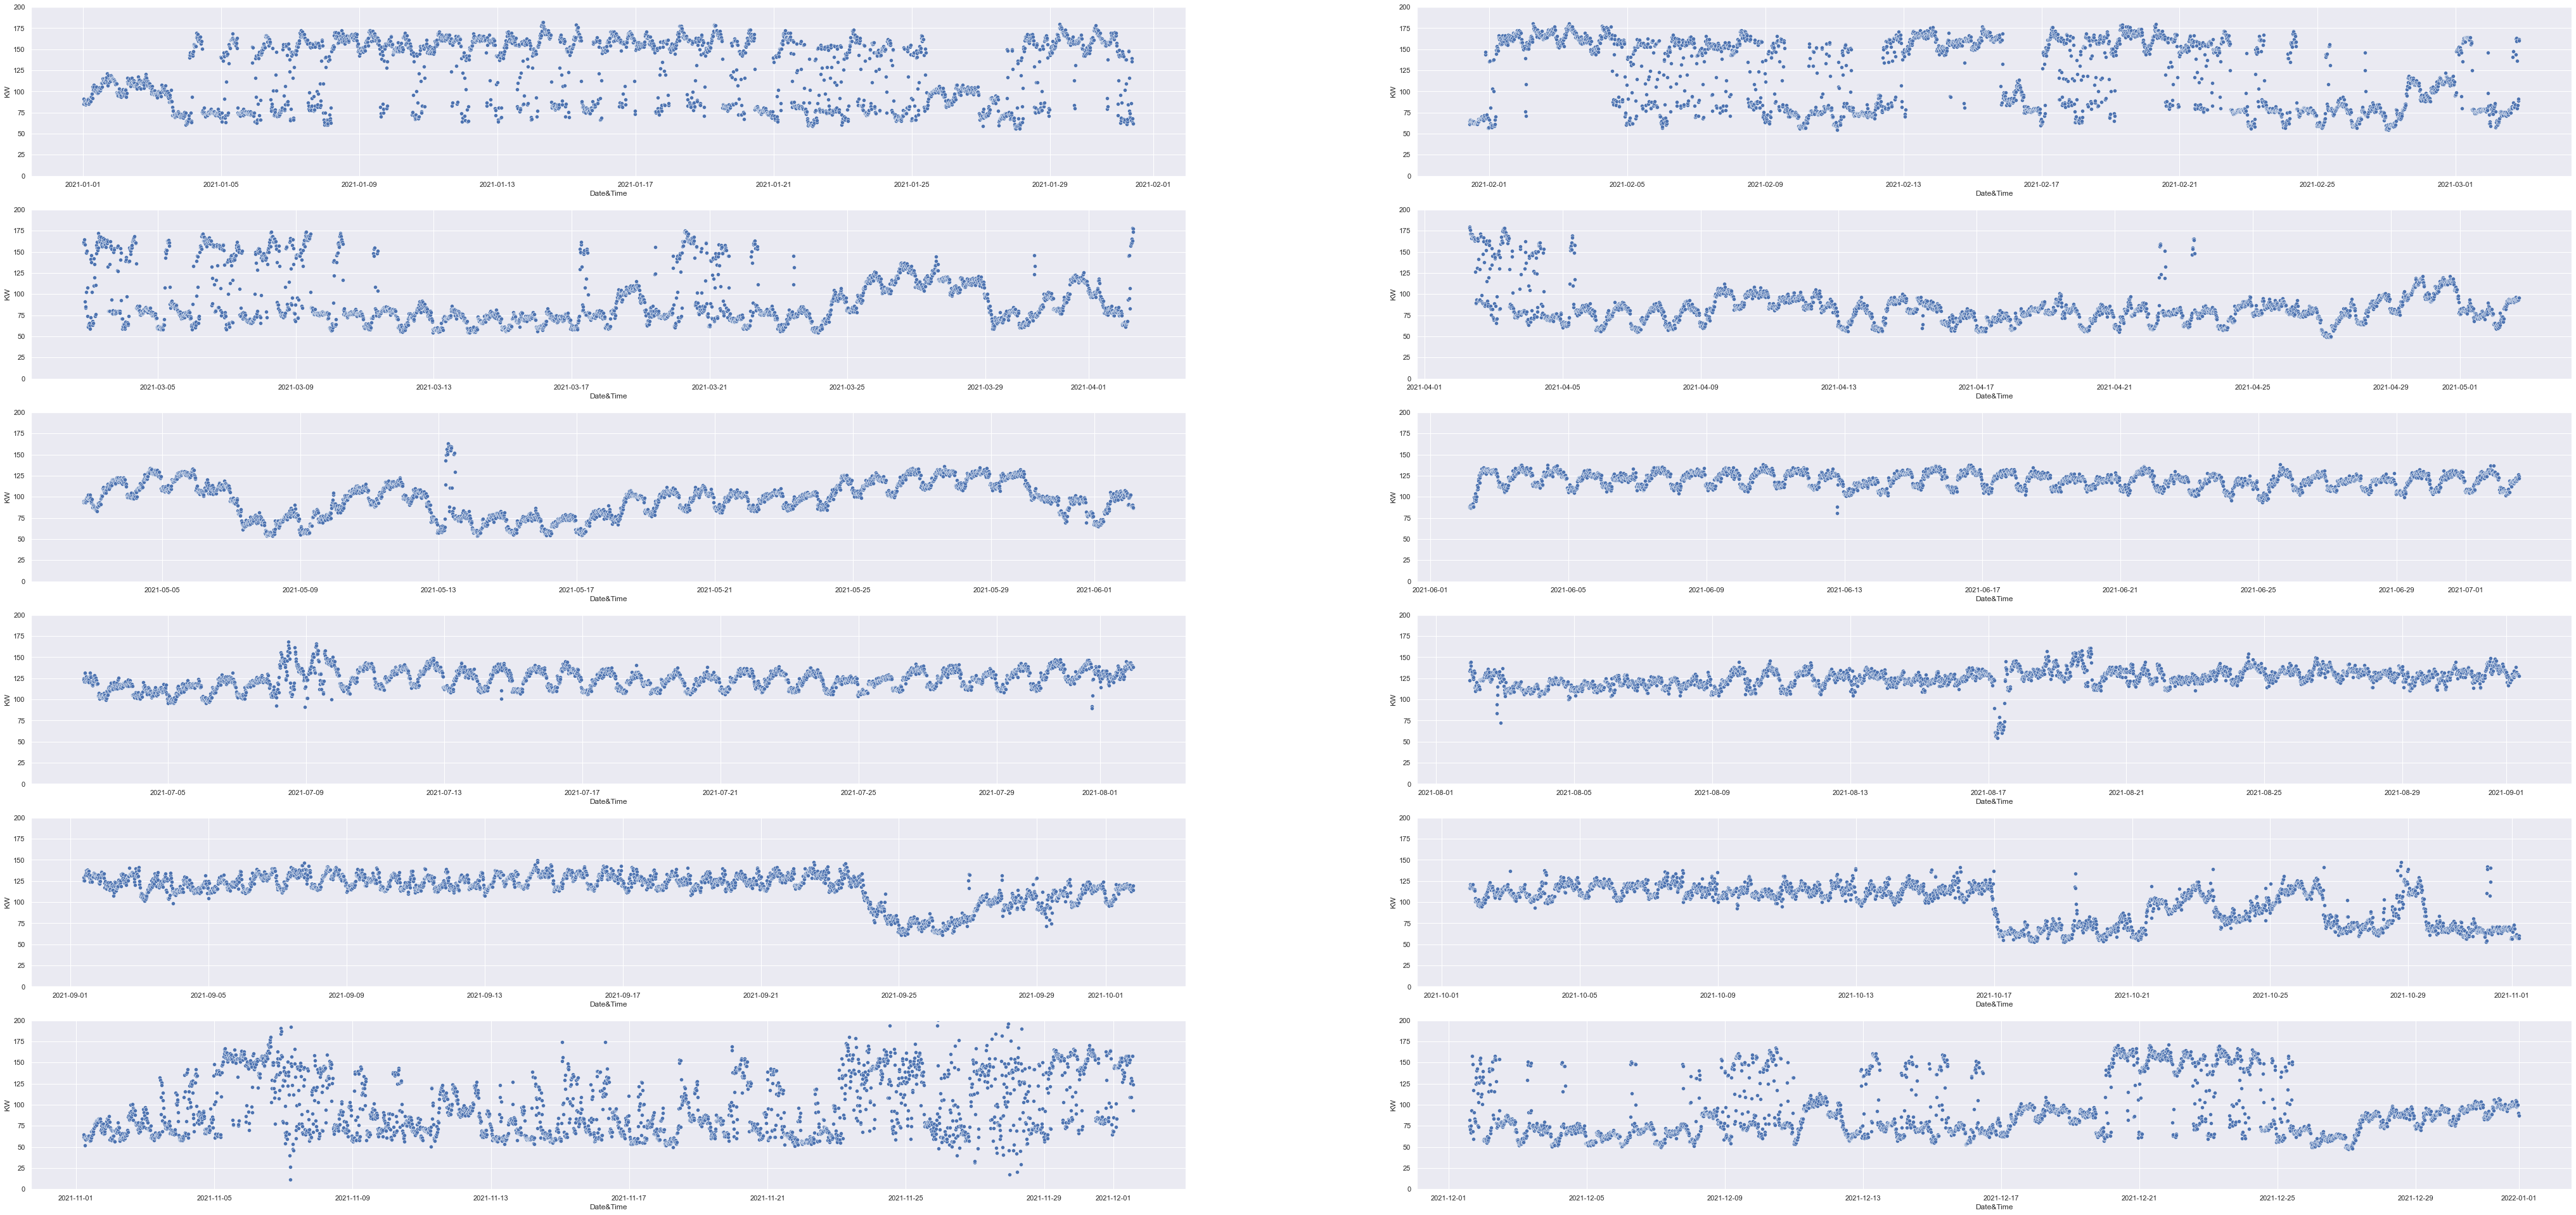

In [49]:
import seaborn as sns
sns.set(color_codes=True)

i = 6    #rows
j = 2    #columns  
df_split = np.array_split(df1,12)

f, axs = plt.subplots(i,j, figsize=(64, 32))
nos=0
for a in range(0,i):
    for b in range(0,j):
        sns.scatterplot(ax=axs[a][b], x = 'Date&Time', y = 'KW', data = df_split[nos]).set(ylim=(0, 200))        
        nos= nos+1
        
#ax.set(ylim=(0, 200))
#ax.set_ylabel('counts')

<AxesSubplot:>

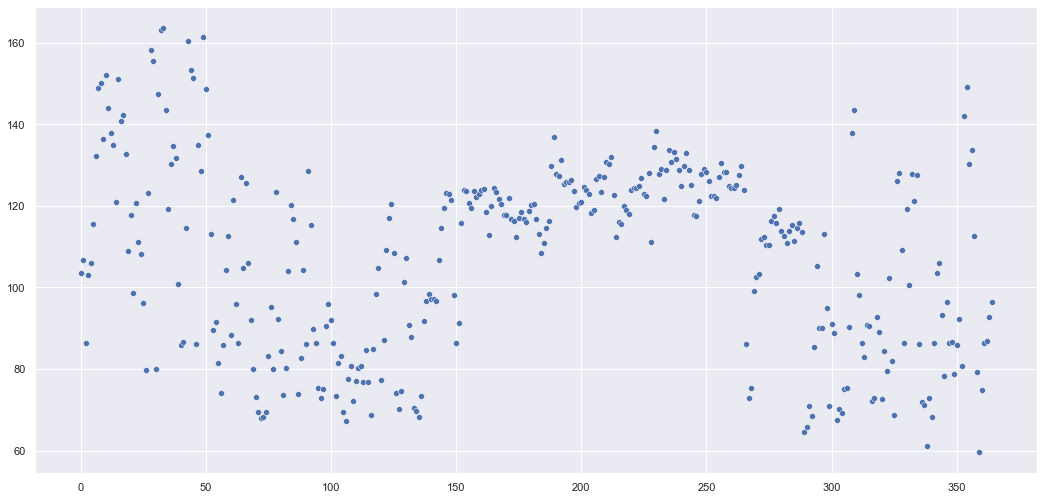

In [50]:
#Plotting of a day
#daily_avg = []
df_split_avg_day = np.array_split(df1,365)
#for i in range(0,365):
df_split_avg_day[i]['KW'].mean()
        
f, ax = plt.subplots(1,1, figsize=(16, 8))        
sns.scatterplot(ax=ax, x = [d for d in range(0,365)], y= daily_avg)

In [51]:
#Set date column as index
df1 = df1.set_index('Date&Time')
df1.index = pd.to_datetime(df1.index)

In [52]:
df1.index

DatetimeIndex(['2021-01-01 00:15:00', '2021-01-01 00:30:00',
               '2021-01-01 00:45:00', '2021-01-01 01:00:00',
               '2021-01-01 01:15:00', '2021-01-01 01:30:00',
               '2021-01-01 01:45:00', '2021-01-01 02:00:00',
               '2021-01-01 02:15:00', '2021-01-01 02:30:00',
               ...
               '2021-12-31 21:45:00', '2021-12-31 22:00:00',
               '2021-12-31 22:15:00', '2021-12-31 22:30:00',
               '2021-12-31 22:45:00', '2021-12-31 23:00:00',
               '2021-12-31 23:15:00', '2021-12-31 23:30:00',
               '2021-12-31 23:45:00', '2022-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date&Time', length=35040, freq=None)

In [53]:
df1

,Meter_ID,KW,KVA,PF
Date&Time,,,,
2021-01-01 00:15:00,01E002218541,91.36,93.36,0.98
2021-01-01 00:30:00,01E002218541,85.04,86.48,0.98
2021-01-01 00:45:00,01E002218541,87.52,88.72,0.99
2021-01-01 01:00:00,01E002218541,87.28,88.72,0.98
2021-01-01 01:15:00,01E002218541,89.12,90.64,0.98
...,...,...,...,...
2021-12-31 23:00:00,01E002218541,99.84,100.24,1.00
2021-12-31 23:15:00,01E002218541,89.20,90.00,0.99
2021-12-31 23:30:00,01E002218541,90.08,90.80,0.99


In [54]:
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

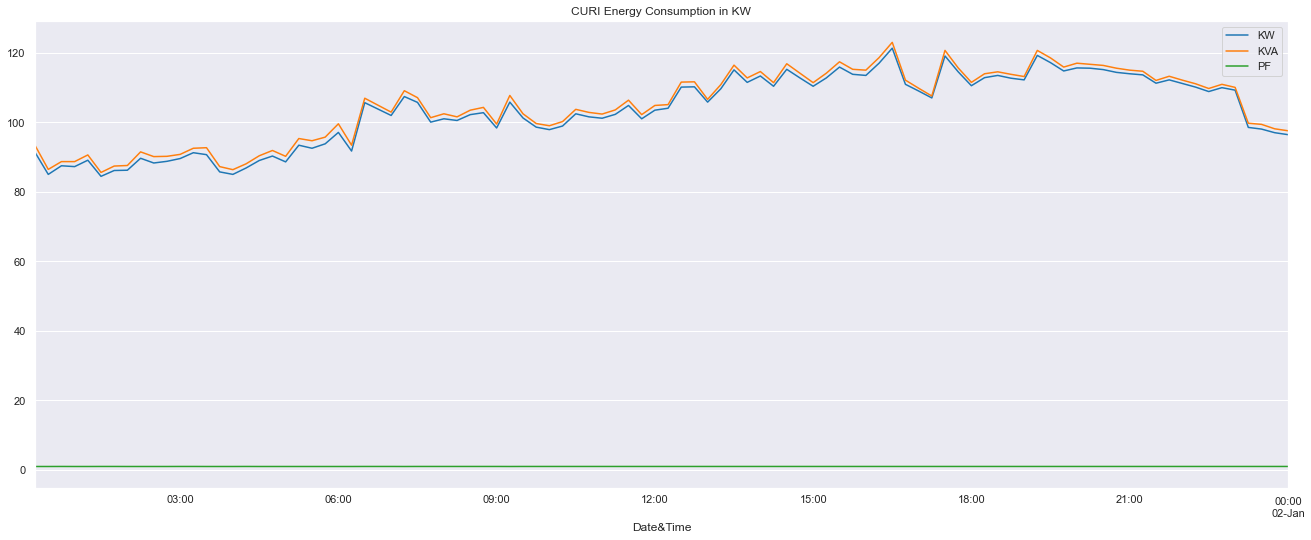

In [55]:
sns.set(color_codes=True)

df1[0:96].plot(style='-',
        figsize=(20, 8),
        color=color_pal,
        title='CURI Energy Consumption in KW')
plt.show()

In [56]:
df3 = df1.reset_index()
#df3 = df3[df3['Date&Time'][0].month == 1]

In [57]:
df3['month'] = pd.DatetimeIndex(df3['Date&Time']).month

df3[df3['month'] == 7]
df4 = df3[:-1]

In [58]:
df5=df4[df4['month'] == 7]
df5.reset_index(drop=True)


,Date&Time,Meter_ID,KW,KVA,PF,month
0,2021-07-01 00:00:00,01E002218541,108.56,109.36,0.99,7
1,2021-07-01 00:15:00,01E002218541,108.88,109.52,0.99,7
2,2021-07-01 00:30:00,01E002218541,106.08,106.72,0.99,7
3,2021-07-01 00:45:00,01E002218541,106.24,106.72,1.00,7
4,2021-07-01 01:00:00,01E002218541,106.80,107.36,0.99,7
...,...,...,...,...,...,...
2971,2021-07-31 22:45:00,01E002218541,133.60,134.56,0.99,7
2972,2021-07-31 23:00:00,01E002218541,138.88,140.32,0.99,7
2973,2021-07-31 23:15:00,01E002218541,125.04,126.08,0.99,7
2974,2021-07-31 23:30:00,01E002218541,125.28,126.40,0.99,7


In [59]:
df5=df5.set_index('Date&Time')


In [60]:
df5.drop(["month","PF"],axis=1,inplace=True)

In [61]:
df4.reset_index(inplace=True)
df4.drop(['index'], axis=1, inplace=True)

C:\Users\shrad\anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
df4

,Date&Time,Meter_ID,KW,KVA,PF,month
0,2021-01-01 00:15:00,01E002218541,91.36,93.36,0.98,1
1,2021-01-01 00:30:00,01E002218541,85.04,86.48,0.98,1
2,2021-01-01 00:45:00,01E002218541,87.52,88.72,0.99,1
3,2021-01-01 01:00:00,01E002218541,87.28,88.72,0.98,1
4,2021-01-01 01:15:00,01E002218541,89.12,90.64,0.98,1
...,...,...,...,...,...,...
35034,2021-12-31 22:45:00,01E002218541,99.36,99.92,0.99,12
35035,2021-12-31 23:00:00,01E002218541,99.84,100.24,1.00,12
35036,2021-12-31 23:15:00,01E002218541,89.20,90.00,0.99,12
35037,2021-12-31 23:30:00,01E002218541,90.08,90.80,0.99,12


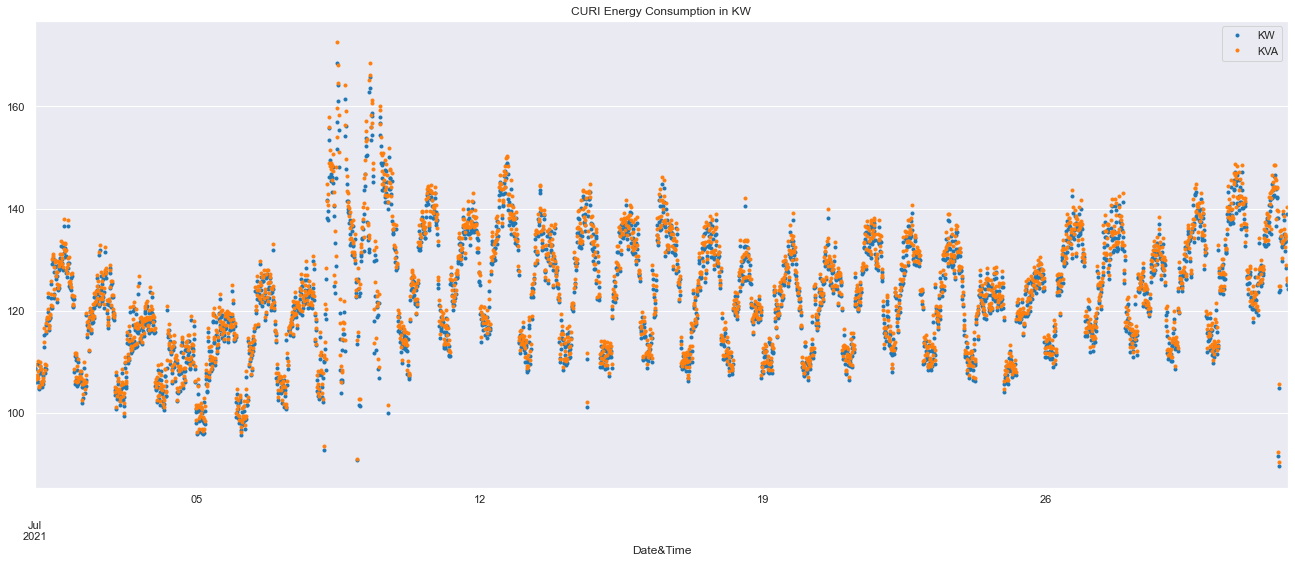

In [63]:
sns.set(color_codes=True)

df5.plot(style='.',
        figsize=(20, 8),
        color=color_pal,
        title='CURI Energy Consumption in KW')
plt.show()

In [64]:
df1

,Meter_ID,KW,KVA,PF
Date&Time,,,,
2021-01-01 00:15:00,01E002218541,91.36,93.36,0.98
2021-01-01 00:30:00,01E002218541,85.04,86.48,0.98
2021-01-01 00:45:00,01E002218541,87.52,88.72,0.99
2021-01-01 01:00:00,01E002218541,87.28,88.72,0.98
2021-01-01 01:15:00,01E002218541,89.12,90.64,0.98
...,...,...,...,...
2021-12-31 23:00:00,01E002218541,99.84,100.24,1.00
2021-12-31 23:15:00,01E002218541,89.20,90.00,0.99
2021-12-31 23:30:00,01E002218541,90.08,90.80,0.99


In [65]:
#Dropping all the irrelevant columns
df7 = df1.drop(['Meter_ID', 'KVA', 'PF'], axis='columns')


In [73]:
df2 = df2.set_index('Date&Time')
df2.index = pd.to_datetime(df2.index)
df8 = df2.drop(['Meter_ID', 'KVA', 'PF'], axis='columns')
df8.head()

,KW
Date&Time,
2022-01-01 00:15:00,87.12
2022-01-01 00:30:00,63.91
2022-01-01 00:45:00,63.35
2022-01-01 01:00:00,69.19
2022-01-01 01:15:00,66.55


In [74]:
df7

,KW
Date&Time,
2021-01-01 00:15:00,91.36
2021-01-01 00:30:00,85.04
2021-01-01 00:45:00,87.52
2021-01-01 01:00:00,87.28
2021-01-01 01:15:00,89.12
...,...
2021-12-31 23:00:00,99.84
2021-12-31 23:15:00,89.20
2021-12-31 23:30:00,90.08


In [75]:
frames = [df7, df8]  
result = pd.concat(frames)
result  #Combination of df7 and df8

,KW
Date&Time,
2021-01-01 00:15:00,91.36
2021-01-01 00:30:00,85.04
2021-01-01 00:45:00,87.52
2021-01-01 01:00:00,87.28
2021-01-01 01:15:00,89.12
...,...
2022-08-24 23:00:00,118.64
2022-08-24 23:15:00,109.92
2022-08-24 23:30:00,108.88


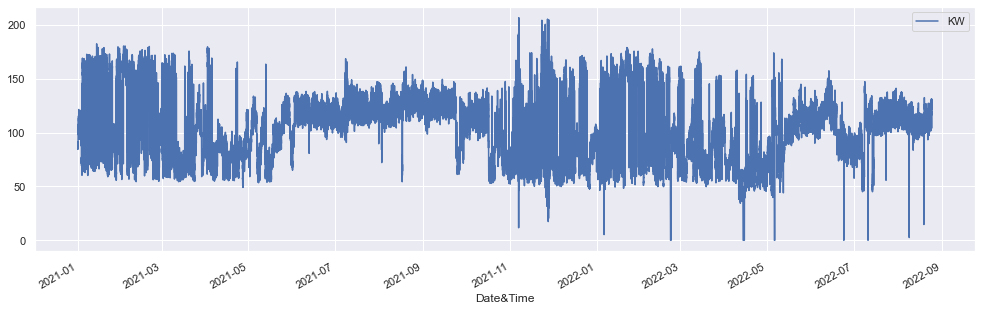

In [76]:
result2= pd.concat(frames)
fig, ax = plt.subplots(figsize=(15,5))
result2.plot(ax=ax, label = 'Test set')
# ax.axvline('2021-12-31', color='black', ls='--')
plt.show()

In [77]:
train = result.loc[result.index <= '2021-12-31']
test = result.loc[result.index > '2021-12-31']

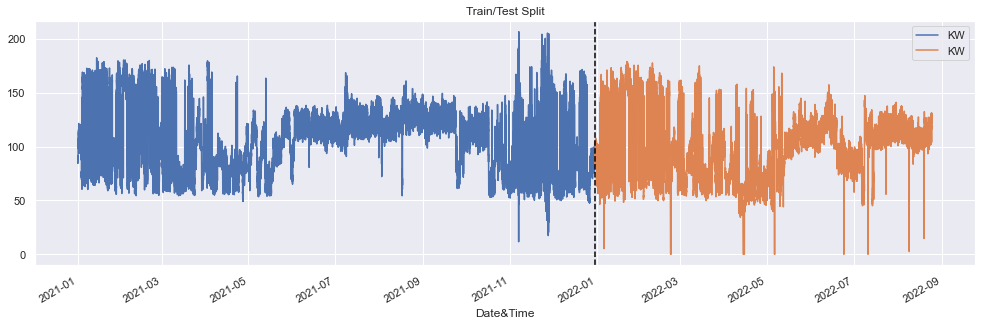

In [78]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label = 'Training set', title = 'Train/Test Split')
test.plot(ax=ax, label = 'Test set')
ax.axvline('2021-12-31', color='black', ls='--')
plt.show()

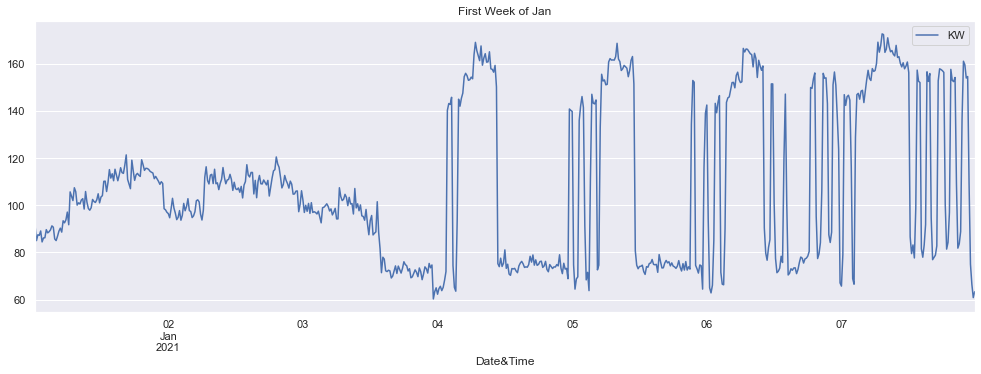

In [79]:
#Getting one week of data
df7.loc[(df7.index > '2021-01-01') & (df7.index < '2021-01-08')].plot(figsize=(15,5), title='First Week of Jan')

plt.show()

In [80]:
mins = list(range(1,97))
mins = mins*601
mins = mins[:-4]
len(mins)

57692

In [81]:
result['hour'] = result.index.hour
result['DayofWeek'] = result.index.day_of_week
result['quarter'] = result.index.quarter
result['month'] = result.index.month
result['year'] = result.index.year
result['dayofyear'] = result.index.dayofyear
result['15_mins'] = mins

In [82]:
result.head(100)

,KW,hour,DayofWeek,quarter,month,year,dayofyear,15_mins
Date&Time,,,,,,,,
2021-01-01 00:15:00,91.36,0,4,1,1,2021,1,1
2021-01-01 00:30:00,85.04,0,4,1,1,2021,1,2
2021-01-01 00:45:00,87.52,0,4,1,1,2021,1,3
2021-01-01 01:00:00,87.28,1,4,1,1,2021,1,4
2021-01-01 01:15:00,89.12,1,4,1,1,2021,1,5
...,...,...,...,...,...,...,...,...
2021-01-02 00:00:00,96.48,0,5,1,1,2021,2,96
2021-01-02 00:15:00,94.72,0,5,1,1,2021,2,1
2021-01-02 00:30:00,98.56,0,5,1,1,2021,2,2


Text(0.5, 1.0, 'KW by 15_mins')

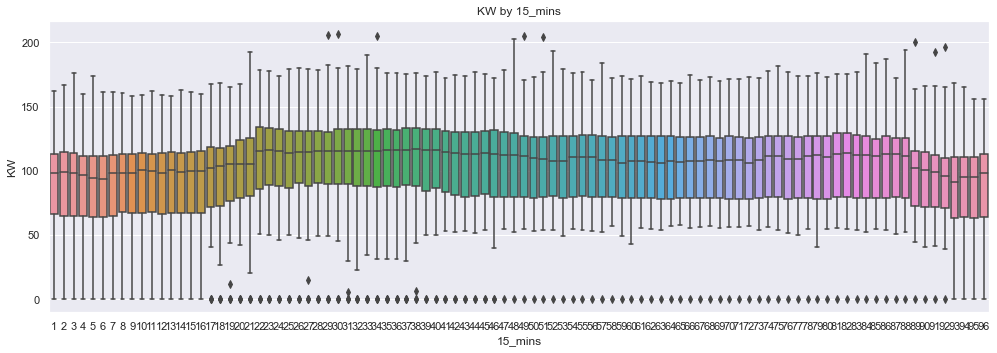

In [83]:
#Visualize our feature/Target Relationship

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=result, x='15_mins', y='KW')
ax.set_title('KW by 15_mins')

Text(0.5, 1.0, 'KW by hour')

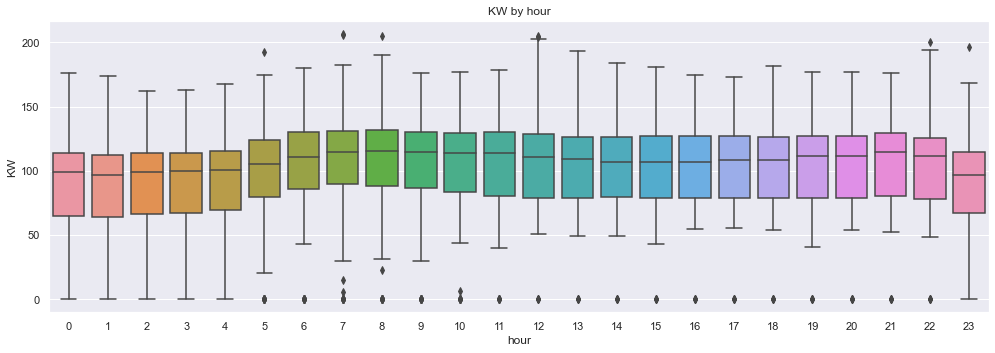

In [84]:
#Visualize our feature/Target Relationship

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=result, x='hour', y='KW')
ax.set_title('KW by hour')

Text(0.5, 1.0, 'KW by month')

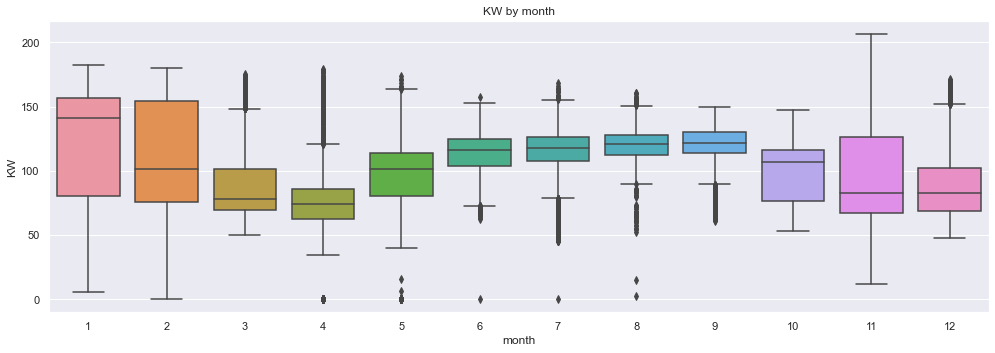

In [85]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=result, x='month', y='KW')
ax.set_title('KW by month')

In [86]:
#CREATE OUR MODEL

In [90]:
result.columns

Index(['KW', 'hour', 'DayofWeek', 'quarter', 'month', 'year', 'dayofyear',
       '15_mins'],
      dtype='object')

In [91]:
result

,KW,hour,DayofWeek,quarter,month,year,dayofyear,15_mins
Date&Time,,,,,,,,
2021-01-01 00:15:00,91.36,0,4,1,1,2021,1,1
2021-01-01 00:30:00,85.04,0,4,1,1,2021,1,2
2021-01-01 00:45:00,87.52,0,4,1,1,2021,1,3
2021-01-01 01:00:00,87.28,1,4,1,1,2021,1,4
2021-01-01 01:15:00,89.12,1,4,1,1,2021,1,5
...,...,...,...,...,...,...,...,...
2022-08-24 23:00:00,118.64,23,2,3,8,2022,236,88
2022-08-24 23:15:00,109.92,23,2,3,8,2022,236,89
2022-08-24 23:30:00,108.88,23,2,3,8,2022,236,90


In [92]:
train = result.loc[result.index <= '2021-12-31']
test = result.loc[result.index > '2021-12-31']

FEATURES = ['15_mins','hour', 'month', 'dayofyear']
TARGET = ['KW']

In [93]:
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [94]:
#Since this is a regresion task we will use a regression model

reg = xgb.XGBRegressor(n_estimators=100000, early_stopping_rounds=30, learning_rate=0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose = 100)

[0]	validation_0-rmse:111.17947	validation_1-rmse:104.06859
[100]	validation_0-rmse:101.06320	validation_1-rmse:93.87820
[200]	validation_0-rmse:91.94628	validation_1-rmse:84.73818
[300]	validation_0-rmse:83.73536	validation_1-rmse:76.55953
[400]	validation_0-rmse:76.34203	validation_1-rmse:69.27737
[500]	validation_0-rmse:69.68462	validation_1-rmse:62.81439
[600]	validation_0-rmse:63.70480	validation_1-rmse:57.09415
[700]	validation_0-rmse:58.33606	validation_1-rmse:52.05043
[800]	validation_0-rmse:53.53094	validation_1-rmse:47.64032
[900]	validation_0-rmse:49.23663	validation_1-rmse:43.81041
[1000]	validation_0-rmse:45.40770	validation_1-rmse:40.51629
[1100]	validation_0-rmse:42.00463	validation_1-rmse:37.71234
[1200]	validation_0-rmse:38.97291	validation_1-rmse:35.35489
[1300]	validation_0-rmse:36.26382	validation_1-rmse:33.41965
[1400]	validation_0-rmse:33.86047	validation_1-rmse:31.85369
[1500]	validation_0-rmse:31.75131	validation_1-rmse:30.60748
[1600]	validation_0-rmse:29.89489

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=30, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [95]:
reg.feature_importances_


array([0.15134847, 0.17452861, 0.23215352, 0.44196934], dtype=float32)

In [96]:
FEATURES

['15_mins', 'hour', 'month', 'dayofyear']

In [97]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['Importance'])
fi

,Importance
15_mins,0.151348
hour,0.174529
month,0.232154
dayofyear,0.441969


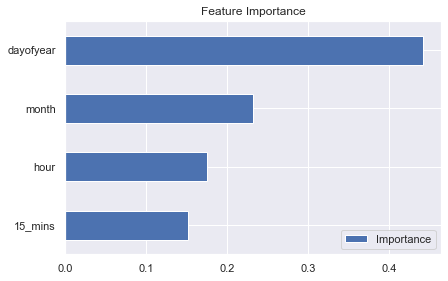

In [98]:
fi.sort_values('Importance').plot(kind='barh', title = 'Feature Importance')
plt.show()

In [99]:
#Forecast on Test Dataset

In [100]:
test['predictions'] = reg.predict(X_test)

C:\Users\shrad\AppData\Local\Temp/ipykernel_22820/118111341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = reg.predict(X_test)


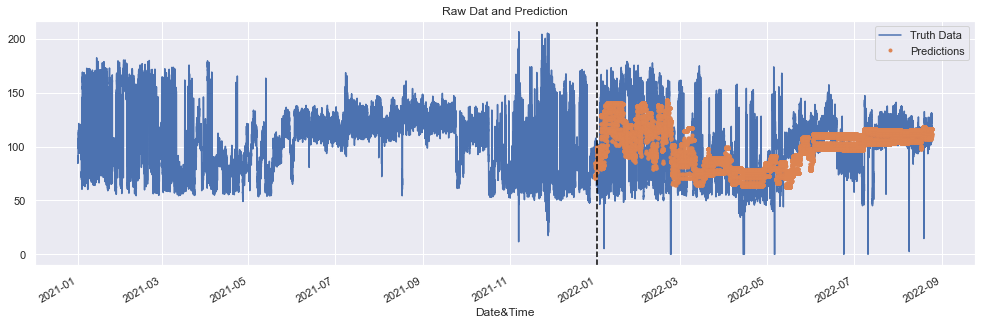

In [101]:
df = result.merge(test[['predictions']], how='left', left_index=True, right_index=True)
ax = df[['KW']].plot(figsize=(15, 5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
ax.axvline('01-01-2022', color='black', ls='--')
plt.show() 

In [102]:
df2 = df[df.index>'2022-01-01'] 

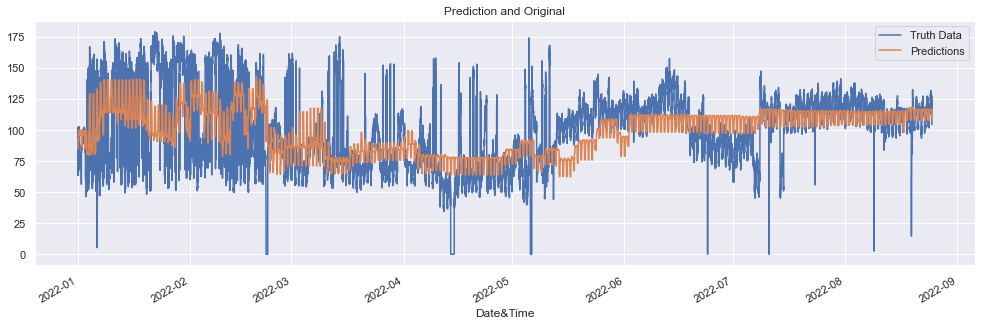

In [103]:
ax = df2[['KW']].plot(figsize=(15, 5), style='-')
df2['predictions'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Prediction and Original')
plt.show() 

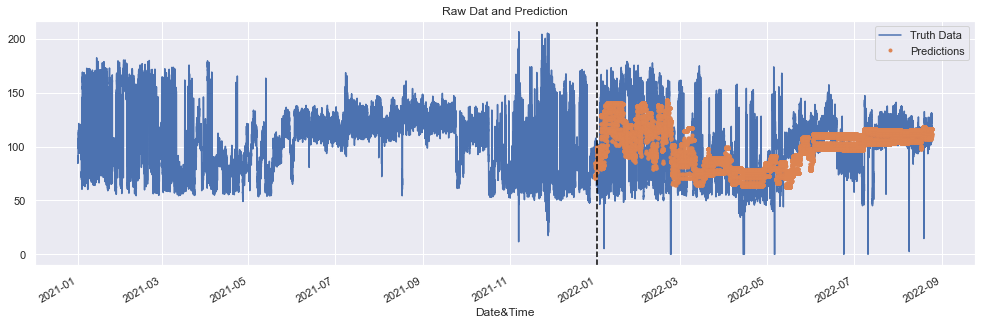

In [104]:
df = result.merge(test[['predictions']], how='left', left_index=True, right_index=True)
ax = df[['KW']].plot(figsize=(15, 5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
ax.axvline('01-01-2022', color='black', ls='--')
plt.show() 

In [105]:
# ax = df.loc[(df.index > '11-01-2021') & (df.index < '11-02-2021')]['KW'] \
#     .plot(figsize=(15, 5), title='Data of the day')
# df.loc[(df.index > '11-01-2021') & (df.index < '11-02-2021')]['predictions'] \
#     .plot(style='.')
# plt.legend(['Truth Data','Prediction'])
# plt.show()

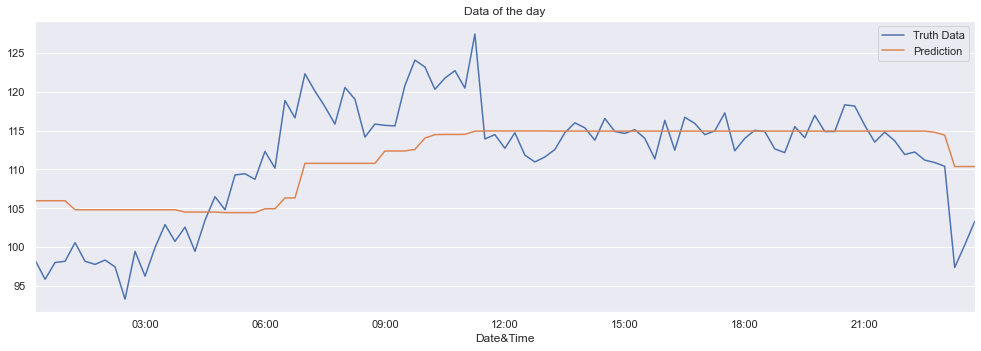

In [106]:
ax = df.loc[(df.index > '08-15-2022') & (df.index < '08-16-2022')]['KW'].plot(figsize=(15, 5), title='Data of the day')
df.loc[(df.index > '08-15-2022') & (df.index < '08-16-2022')]['predictions'].plot(style='-')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [107]:
# Score (RMSE)
# https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828

In [108]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [113]:
score = np.sqrt(mean_squared_error(test['KW'], test['predictions']))

score1 = np.mean(np.abs(test['KW'] - test['predictions']))

score2 = mean_absolute_percentage_error(y_true=test['KW'], y_pred=test['predictions'])

print(f'RMSE Score on Test set: {score:0.2f}')
print(f'MAE Score on Test set: {score1:0.2f}')    

RMSE Score on Test set: 27.42
MAE Score on Test set: 20.39


C:\Users\shrad\AppData\Local\Temp/ipykernel_22820/2025090320.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true-y_pred)/y_true))*100


In [190]:
# Calculate Error

# test['error'] = np.abs(test[TARGET] - test['predictions'])
# test['date'] = test.index.date
#test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

In [191]:
test['error'] = np.abs(test['KW'] - test['predictions'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

C:\Users\sanke\AppData\Local\Temp\ipykernel_11972\2603512909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test['KW'] - test['predictions'])
C:\Users\sanke\AppData\Local\Temp\ipykernel_11972\2603512909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


date
2022-04-14    73.706793
2022-03-13    65.359291
2022-01-22    65.139019
2022-02-13    61.936202
2022-02-22    60.938903
2022-01-21    53.158651
2022-05-06    53.146530
2022-01-27    52.433368
2022-02-19    52.186646
2022-02-03    51.445477
Name: error, dtype: float64

In [192]:
test['error'] = np.abs(test['KW'] - test['predictions'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

C:\Users\sanke\AppData\Local\Temp\ipykernel_11972\2094310282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test['KW'] - test['predictions'])
C:\Users\sanke\AppData\Local\Temp\ipykernel_11972\2094310282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


date
2022-07-16    2.269763
2022-06-05    2.466917
2022-07-17    2.550985
2022-07-10    2.644291
2022-08-07    2.791100
2022-05-08    3.246358
2022-06-06    3.282318
2022-08-16    3.439418
2022-07-15    3.501364
2022-08-21    3.873193
Name: error, dtype: float64

In [1]:
# from sklearn.metrics import accuracy_score
# accuracy = clf.score(test['KW'], test['predictions'])
# print("Accuracy: %.2f%%" % (accuracy))

In [226]:
test['KW'].shape

(22748,)